# Bankcustomer Leaving Prediction

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('BankCustomers.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
dataset.shape

(10000, 14)

## convert categorical feature into dummy variables

In [4]:
pd.get_dummies(dataset['Geography'])

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [5]:
# convert categorical feature into dummy variables
dataset['Geography']=pd.get_dummies(dataset['Geography'],drop_first=True)


In [6]:
dataset.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,0,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,Female,42,8,159660.80,3,1,0,113931.57,1


In [7]:
dataset['Geography'].value_counts()

0    7491
1    2509
Name: Geography, dtype: int64

## convert categorical feature into dummy variables

In [8]:
pd.get_dummies(dataset['Gender'])

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9995,0,1
9996,0,1
9997,1,0
9998,0,1


In [9]:
# # convert categorical feature into dummy variables
dataset['Gender']=pd.get_dummies(dataset['Gender'],drop_first=True)

In [10]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,0,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,0,0,43,2,125510.82,1,1,1,79084.10,0


In [11]:
dataset['Gender'].value_counts()

1    5457
0    4543
Name: Gender, dtype: int64

In [12]:
# dropping unnecessary columns
dataset = dataset.drop(['Geography','Gender'], axis = 1)

In [13]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0


In [14]:
# splitting data into X and y
X = dataset.iloc[:, 3:11].values
y = dataset.iloc[:, 11].values

In [15]:
X

array([[6.1900000e+02, 4.2000000e+01, 2.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [6.0800000e+02, 4.1000000e+01, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [5.0200000e+02, 4.2000000e+01, 8.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [7.0900000e+02, 3.6000000e+01, 7.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [7.7200000e+02, 4.2000000e+01, 3.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [7.9200000e+02, 2.8000000e+01, 4.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [16]:
y

array([1, 0, 1, ..., 1, 1, 0])

## Splitting the dataset into the Training set and Test set

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [18]:
#input_dim is 8
X_train.shape

(8000, 8)

In [19]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Now let's make the ANN!

In [20]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
/home/madanmaram/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/madanmaram/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/madanmaram/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/madanmaram/anaconda3/lib/python3.7/sit

In [21]:
# Initialising the ANN
classifier = Sequential()

In [22]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", input_dim=8, units=6, kernel_initializer="uniform"))


In [23]:
# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))


In [24]:
# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))


In [25]:

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [26]:
# Fit the model
history = classifier.fit(X_train, y_train, epochs=10, batch_size=10)



Epoch 1/10
8000/8000 [==============================] - 2s 223us/step - loss: 0.4983 - accuracy: 0.7954
Epoch 2/10
8000/8000 [==============================] - 2s 191us/step - loss: 0.4380 - accuracy: 0.7960
Epoch 3/10
8000/8000 [==============================] - 2s 190us/step - loss: 0.4329 - accuracy: 0.7960
Epoch 4/10
8000/8000 [==============================] - 2s 203us/step - loss: 0.4296 - accuracy: 0.8009
Epoch 5/10
8000/8000 [==============================] - 1s 183us/step - loss: 0.4260 - accuracy: 0.8202
Epoch 6/10
8000/8000 [==============================] - 2s 197us/step - loss: 0.4248 - accuracy: 0.8265
Epoch 7/10
8000/8000 [==============================] - 2s 203us/step - loss: 0.4235 - accuracy: 0.8289
Epoch 8/10
8000/8000 [==============================] - 2s 202us/step - loss: 0.4221 - accuracy: 0.8314
Epoch 9/10
8000/8000 [==============================] - 2s 193us/step - loss: 0.4212 - accuracy: 0.8292
Epoch 10/10
8000/8000 [==============================] - 2s 193

In [27]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


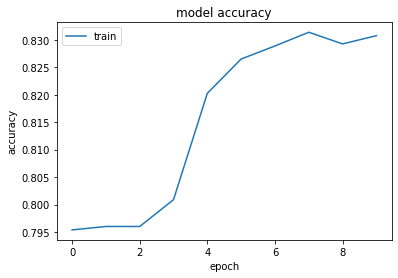

In [28]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

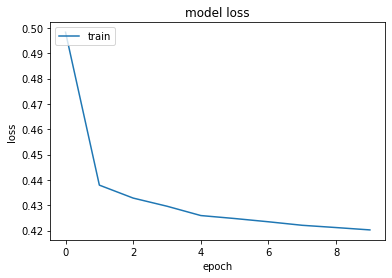

In [33]:
# summarize history for loss
plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Making the predictions and evaluating the model


In [40]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)


In [41]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score

In [44]:
cm = confusion_matrix(y_test, y_pred)
accuracy=accuracy_score(y_test,y_pred)

In [45]:
print(accuracy)

0.835
